# Loading Packages

<span style="color:red"> We will start off by loading the required packages which have been used throughout these project.

In [242]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import wordnet as wn
from collections import defaultdict
from nltk import pos_tag
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np

import nltk 
nltk.download('# 1. Loading Required Packageswordnet')

from nltk.tokenize import word_tokenize

from nltk.tokenize import blankline_tokenize

from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, WordNetLemmatizer

[nltk_data] Error loading # 1. Loading Required Packageswordnet:
[nltk_data]     Package '# 1. Loading Required Packageswordnet' not
[nltk_data]     found in index


# 2. Loading Dataset

<span style="color:red"> Next, we will load the train and test dataset into a pandas data frame. We will stack both the train and test data together and then do the data preparation and data creation.

In [218]:
## Read the training data set

df_train = pd.read_csv("F:/IE Big Data & Business Analytics/Term 3/NLP/1st assignment data/fake_or_real_news_training.csv")

## Display the top 6 rows

df_train.head()

## Remove the last two un-necessary columns

df_train = df_train.drop(["X1", "X2"], axis = 1)

## Display the top 6 rows again

df_train.head()


,ID,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [220]:
## Read the training data set

df_test = pd.read_csv("F:/IE Big Data & Business Analytics/Term 3/NLP/1st assignment data/fake_or_real_news_test.csv")

## Display the top 6 rows

df_test.head()


,ID,title,text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...


# 3. Data Preparation & EDA

<span style="color:red"> We will merge the train and test dataset together in order to carry out the same data preparation and data cleaning activities in both the datasets.

In [221]:
## Append the train and test data set

df = df_train.append(df_test, ignore_index=True , sort = True)

## Display the top 6 rows

df.head()

,ID,label,text,title
0,8476,FAKE,"Daniel Greenfield, a Shillman Journalism Fello...",You Can Smell Hillary’s Fear
1,10294,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,REAL,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy
3,10142,FAKE,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",Bernie supporters on Twitter erupt in anger ag...
4,875,REAL,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matters


## 3.1 Tokenization

<span style="color:red"> We will first calculate the number of tokens in the title as well as in the text column and create two extra columns with the count of the tokens respectively. Then we visualize the spread of the tokens using a histogram.

In [222]:
## Define empty lists

text_token_len =[]
title_token_len =[]

## Loop over each row of the data frame to count the length of token for text & title

for row in range(0,len(df)) :
    text_token_len.append(len(word_tokenize(df["text"][row])))

for row in range(0,len(df)) :
    title_token_len.append(len(word_tokenize(df["title"][row])))
    
## Create the additional column

df["text_token_len"] = text_token_len
df["title_token_len"] = title_token_len


<span style="color:red"> From the plot below, we can see that the distrobution of tokens is highly left skewed in both the text and the title columns.
<span style="color:red"> Most of the "text" column contain less than 2,000 tokens where as in the column "title" the number of tokens is mostly less than 20.

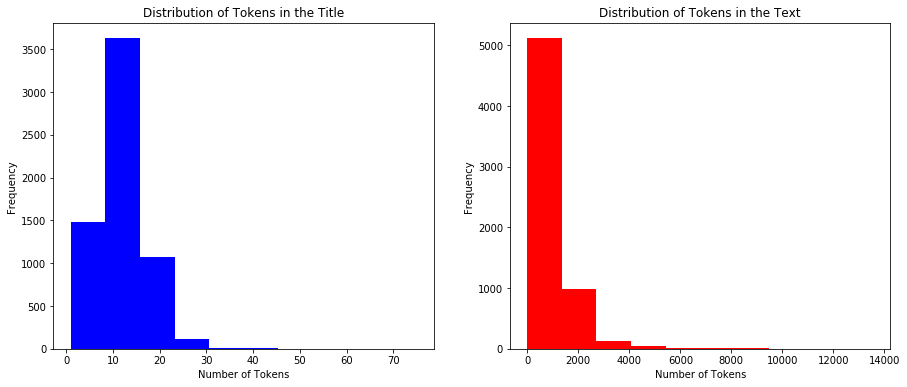

In [20]:
plt.figure(figsize=(15,6))


## Create the first plot

plt.subplot(1,2,1)

plt.hist(df["title_token_len"] ,  color = "blue")
plt.title("Distribution of Tokens in the Title")
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

## Create the second plot
plt.subplot(1,2,2)

plt.hist(df["text_token_len"] ,  color = "red")
plt.title("Distribution of Tokens in the Text")
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.show()

## 3.2 Blank Tokenization

In [223]:
## Define empty lists

text_token_blank_len =[]
title_token_blank_len =[]

## Loop over each row of the data frame to count the length of token for text & title

for row in range(0,len(df)) :
    text_token_blank_len.append(len(blankline_tokenize(df["text"][row])))

for row in range(0,len(df)) :
    title_token_blank_len.append(len(blankline_tokenize(df["title"][row])))
    
## Create the additional column

df["text_token_blank_len"] = text_token_blank_len
df["title_token_blank_len"] = title_token_blank_len

<span style="color:red"> The number of blank i.e the number of paragrahs in each text is mostly between 0 to 50 with few texts containing more blanks 
than 50.

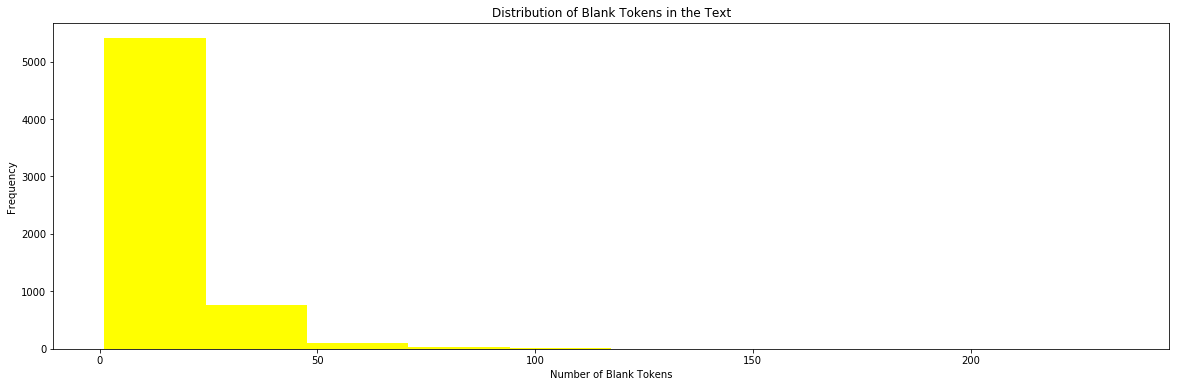

In [61]:
plt.figure(figsize=(20,6))

plt.hist(df["text_token_blank_len"] ,  color = "yellow")
plt.title("Distribution of Blank Tokens in the Text")
plt.xlabel('Number of Blank Tokens')
plt.ylabel('Frequency')

plt.show()

## 3.3  Stemming & Lametization

<span style="color:red"> Now we will use various stemming techniques (like Porter & Lancaster stemming) and word net lemetization on the both columns 
"text" & "title" and then count the number of unique tokens in them.

In [224]:
## Defining Porter Stemmer

ps = PorterStemmer()

## Defining blank lists

text_ps_token_len =[]
title_ps_token_len =[]

## Calculate tokens for after porter stemming

for word in df["text"]:
    text_ps_token_len.append(len(word_tokenize(ps.stem(word))))
    
for word in df["title"]:
    title_ps_token_len.append(len(word_tokenize(ps.stem(word))))

    
## Create additional columns

df["text_ps_token_len"] = text_ps_token_len
df["title_ps_token_len"] = title_ps_token_len


## Defining Lancaster Stemmer

ls = LancasterStemmer()

## Defining blank lists

text_ls_token_len =[]
title_ls_token_len =[]

## Calculate tokens for after lancaster stemming

for word in df["text"]:
    text_ls_token_len.append(len(word_tokenize(ls.stem(word))))
    
for word in df["title"]:
    title_ls_token_len.append(len(word_tokenize(ls.stem(word))))

    
## Create additional columns

df["text_ls_token_len"] = text_ls_token_len
df["title_ls_token_len"] = title_ls_token_len

## Defining Wordnet Lametizer

wn = WordNetLemmatizer()

## Defining blank lists

text_wn_token_len =[]
title_wn_token_len =[]

## Calculate tokens for after lancaster stemming

for word in df["text"]:
    text_wn_token_len.append(len(word_tokenize(wn.lemmatize(word))))
    
for word in df["title"]:
    title_wn_token_len.append(len(word_tokenize(wn.lemmatize(word))))

    
## Create additional columns

df["text_wn_token_len"] = text_wn_token_len
df["title_wn_token_len"] = title_wn_token_len


### Number of Different Tokens Between Different Stemming & Lametizing Techniques

In [225]:
## Caclulate the number of cases where the numebr of tokens is different between differnt types of stemming and lametizing

df["is_different"] = np.where((df["text_wn_token_len"] == df["text_ls_token_len"])  & 
                              (df["text_ls_token_len"] == df["text_ps_token_len"]) &
                              (df["text_ps_token_len"] == df["text_token_len"]),0,1)

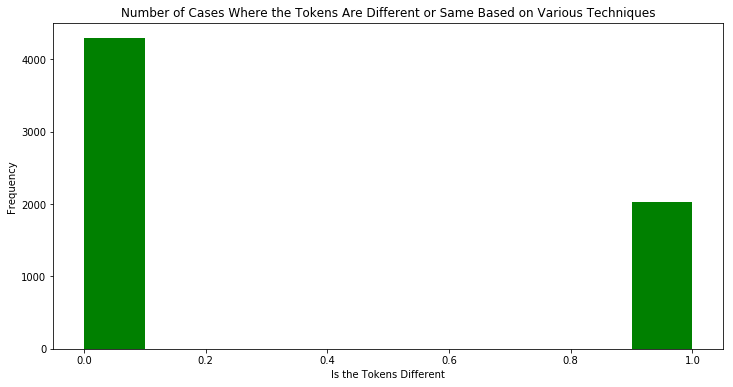

In [64]:
## Plot the distribution of the "is_different" column

plt.figure(figsize=(12,6))


plt.hist(df["is_different"] ,  color = "green")
plt.title("Number of Cases Where the Tokens Are Different or Same Based on Various Techniques")
plt.xlabel('Is the Tokens Different')
plt.ylabel('Frequency')

plt.show()

## 3.4 Lexical Diversity

In [226]:
## Defining blank lists

text_ld =[]
title_ld =[]

## Calculate tokens for after lancaster stemming

for word in range(0,len(df)) :
    text_ld.append(len(set(df["text"][word]))/len(df["text"][word]))
    
for word in range(0,len(df)) :
    title_ld.append(len(set(df["title"][word]))/len(df["title"][word]))

    
## Create additional columns

df["text_ld"] = text_ld
df["title_ld"] = title_ld

## 3.5 Display the Final Data

In [227]:
df.head()

,ID,label,text,title,text_token_len,title_token_len,text_token_blank_len,title_token_blank_len,text_ps_token_len,title_ps_token_len,text_ls_token_len,title_ls_token_len,text_wn_token_len,title_wn_token_len,is_different,text_ld,title_ld
0,8476,FAKE,"Daniel Greenfield, a Shillman Journalism Fello...",You Can Smell Hillary’s Fear,1473,7,1,1,1473,7,1473,7,1473,7,0,0.007848,0.642857
1,10294,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...,517,16,1,1,516,16,516,16,517,16,1,0.024943,0.376471
2,3608,REAL,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy,484,9,9,1,484,9,484,9,484,9,0,0.020842,0.418605
3,10142,FAKE,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",Bernie supporters on Twitter erupt in anger ag...,498,18,2,1,497,18,497,18,498,18,1,0.028571,0.297619
4,875,REAL,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matters,376,10,11,1,376,10,376,10,376,10,0,0.032065,0.479167


# 4. Approach 1) Modeling On Above Created Features

<span style="color:red"> Using the columns that we have created above we will first create a base line model to test the performance of our model. For this we will first split our training data set into 90% train and rest into test and use the random forest algorithm to check for accuracy.

In [230]:
## Filtering out the train data from the merged dataframe

train = df[df['label'].notnull()]

## Removing all labels other than "fake" & "real"

train = train[train.label == "FAKE"].append(train[train.label == "REAL"])

## Convert the label from string to numerical value

train['label'] = train['label'].map({'FAKE': 1, 'REAL': 0})

## Split the train data into train and test

x_train = train.sample(frac =0.9, random_state = 6497)

x_test = train.loc[~train.index.isin(x_train.index), :]

## Create two seperate dataframes. The first one contains all the features and the second contains the corresponding labels

x_train_data = x_train[["text_ld", "title_ld","is_different","title_token_blank_len","text_token_blank_len",
                             "text_wn_token_len", "title_wn_token_len"]]

x_train_label = x_train.iloc[:,1]

## Run random forest algorithm 

rf = RandomForestClassifier(n_estimators = 500)

rf.fit(x_train_data,x_train_label)

## Test on the test dataset

x_test_data = x_test[["text_ld", "title_ld","is_different","title_token_blank_len","text_token_blank_len",
                             "text_wn_token_len", "title_wn_token_len"]]

x_test_label = x_test.iloc[:,1]

## Check the accuracy

print ("The Accuracy on the Test Dataset is ::", accuracy_score(x_test_label,rf.predict(x_test_data)) )



The Accuracy on the Test Dataset is :: 0.9672544080604534


<span style="color:red"> The above random forest classification gives a very good accuracy of about 97%. Below we will check the confusion matrix for the same.

## 4.1 Confusion Matrix

In [154]:
## Create confusion matrix

confusion_matrix(x_test_label,rf.predict(x_test_data))

array([[205,   4],
       [  9, 179]], dtype=int64)

## 4.2 Feature Importance

Text(0.5, 1.0, 'Feature Importance')

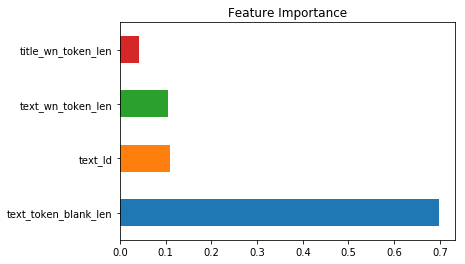

In [162]:
feat_importances = pd.Series(rf.feature_importances_, index=x_test_data.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.title("Top 4 Feature Importance Variables")

<span style="color:red">  From the above plot we can say that the above four features are most important in classifying if the news is fake or not.
<span style="color:red"> Furthermore, the number of blanks seems to play the most crucial role in determining if the news are fake or not.

## 4.3 Random Forest With Cross Validation

In [165]:
rf = RandomForestClassifier(max_depth = 7, random_state = 0)
cross_val_score(rf,x_train_data,x_train_label,scoring='accuracy',cv=5,verbose=5,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


array([0.97202797, 0.96358543, 0.96358543, 0.97054698, 0.95231417])

<span style="color:red"> The 5 - fold cross validation on the data set is also giving as an accuracy of about 96 % on average.

# 5. Approach 2) TFID Vectorization

<span style="color:red"> We will start of by concanating both the text and the title together then clean and lametize the column and finally run TFID vectorization on it. 

## 5.1 Data Manipulation & Tokenization

In [240]:
## Filter out the required columns

df_new = df[["label","text","title"]]

## Concat the tilte and text
df_new["concat"] = df_new["text"] + df_new["title"]

## Convert all the words into lower form

df_new["concat"] = [entry.lower() for entry in df_new["concat"]]

## Tokenize the column

df_new["concat"] = [word_tokenize(entry) for entry in df_new["concat"]]

C:\Users\SOHAMJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SOHAMJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\SOHAMJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

## 5.2 Data Preparation

In [243]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(df_new["concat"]):
    
    # Declaring Empty List to store the words that follow the rules for this step
    
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else
    
    for word, tag in pos_tag(entry):
        
        # Below condition is to check for Stop words and consider only alphabets
        
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
            
    # The final processed set of words for each iteration will be stored in 'text_final'
    
    df_new.loc[index,'text_final'] = str(Final_words)
    


C:\Users\SOHAMJIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\SOHAMJIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\SOHAMJIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

## 5.3 Data Cleaning

In [244]:
df_new = df_new[df_new.label == "FAKE"].append(df_new[df_new.label == "REAL"])
## Convert the label to numeric type 

df_new['label'] = df_new['label'].map({'FAKE': 1, 'REAL': 0})

## Split the test train data set

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.1)

## 5.4 Creation of TFIDF

In [245]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [247]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_new['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## 5.5 Naive Bayes Algorithm

In [248]:
## Fit the training dataset on the NB classifier

Naive = naive_bayes.MultinomialNB()

Naive.fit(Train_X_Tfidf,Train_Y)

## Predict the labels on validation dataset

predictions_NB = Naive.predict(Test_X_Tfidf)

## Use accuracy_score function to get the accuracy

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  88.9168765743073


## 5.6 Random Forest Algorithm

In [249]:
## Fit the training dataset on the RF classifier

RF = RandomForestClassifier(max_depth = 7, n_estimators = 1000, random_state = 6497)

RF.fit(Train_X_Tfidf,Train_Y)

## Predict the labels on validation dataset

predictions_RF = RF.predict(Test_X_Tfidf)


## Use accuracy_score function to get the accuracy

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)

Naive Bayes Accuracy Score ->  85.13853904282117


<span style="color:red"> Based on the above two methodologies , we can clearly see that the accuracy in the approach 1 is way better than that of the second approach. So, we will use the random forest algorithm from the first approach to predict the type of news in our test dataset.

# 6. Create Final Submission File

In [237]:
## Filter out the test dataset

test = df[df['label'].isnull()]
test = test[["text_ld", "title_ld","is_different","title_token_blank_len","text_token_blank_len",
                             "text_wn_token_len", "title_wn_token_len"]]

## Create submission dataframe

submission = pd.DataFrame()
submission["ID"] = df[df['label'].isnull()]["ID"]
submission['Target'] = rf.predict(test)

## Replace numeric interger in target column with string (Real / Fake)

submission['Target'] = submission['Target'].map({1: "FAKE", 0: "REAL"})

## Display the top 6 rows

submission.head()


,ID,Target
3999,10498,REAL
4000,2439,REAL
4001,864,REAL
4002,4128,REAL
4003,662,REAL


# 7 Write to Hard Disk

In [239]:
## Write to hard disk

submission.to_csv('F:/IE Big Data & Business Analytics/Term 3/NLP/1st assignment data/Sohamjit_Mukherjee-Prediction.csv')